# Assessing Amtrak Trespasser Fatalities in California

DSAN 6750 / PPOL 6805: GIS for Spatial Data Science

Lindsay Strong (Georgetown University)

## Introduction

Several previous studies have found robust relationships between spatial properties of a country’s **capital city** and that country’s propensity for **conflict** and **misgovernance**.

Perceptions of this linkage also have an effect on “coup-proofing” decisions made by national governments. A recent BBC interview with Equatorial Guinea’s President Teodoro Obiang, for example, highlighted this as a factor behind his decision to relocate the capital city:

> It’s the remoteness of Oyala that makes it so appealing to President Obiang. In a rare interview he described how rebels had recently plotted a seaborne assault on his palace in the current capital, Malabo. ‘We need a secure place for my government and for future governments. That’s why we have created Oyala, to guarantee the government of Equatorial Guinea.’ ([Sackur 2012](#ref-sackur_equatorial_2012))

This case is far from exceptional, as an even more recent *Washington Post* article points out with respect to Myanmar’s decision to move its capital from Yangon to Naypyidaw:

> Analysts have described the decision as motivated by a desire to secure the military’s seat of power from any threat of protests or invasions. ([Berger 2021](#ref-berger_myanmars_2021))

Most of these studies, however, are based on observations of **conflict events**. In this study, we study the more fundamental variable of a capital’s distance from the **population centroid** of the country.

## Literature Review

Campante, Do, and Guimaraes ([2019](#ref-campante_capital_2019)) analyzes the relationship between the location of a **capital city** and the degree of conflict and misgovernance in a given country. Their two key findings are that:

> Conflict is more likely to emerge (and dislodge incumbents) closer to the capital

and

> Isolated capitals are associated with misgovernance.

This first finding is illustrated in <a href="#fig-conflict-dist" class="quarto-xref">Figure 1</a>

<figure id="fig-conflict-dist">

<figcaption>Figure 1</figcaption>
</figure>

## Methodology

The **population centroids** we use herein might require some explanation, since the term “centroid” can be ambiguous.

Here, the population centroids are drawn from Hall et al. ([2019](#ref-hall_population_2019))

## Exploratory Data Analysis (EDA)

Here we plot the base GIS objects we’re analyzing: the location of each **capital city** (in purple) and each **population centroid** (in yellow).

In [ ]:
# import libraries and csv
cb_palette <- c(
  "#E69F00", "#56B4E9", "#009E73", "#F0E442","#0072B2", "#D55E00", "#CC79A7"
)
library(sf)

Linking to GEOS 3.11.0, GDAL 3.5.3, PROJ 9.1.0; sf_use_s2() is TRUE

Rows: 7257 Columns: 21

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): the_geom, RAILROAD, INCDTNO, AGE, CAS57, AMPM, cnty10, rr, STATUS,...
dbl  (5): YEAR4, TIMEHR, TIMEMIN, LATITUDE, LONGITUD
num  (1): OBJECTID
lgl  (1): COVERDATA

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

In [ ]:
library(tigris)

To enable caching of data, set `options(tigris_use_cache = TRUE)`
in your R script or .Rprofile.

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Your original .Renviron will be backed up and stored in your R HOME directory if needed.
Your API key has been stored in your .Renviron and can be accessed by Sys.getenv("CENSUS_API_KEY"). 
To use now, restart R or run `readRenviron("~/.Renviron")`

[1] "22de4cafe1259cf144997981fc5e359e41276773"

Getting data from the 2016-2020 5-year ACS

In [ ]:
# library(tidycensus)
# library(dplyr)
# library(sf)
# library(tigris)

# census_api_key("22de4cafe1259cf144997981fc5e359e41276773", install = TRUE, overwrite = TRUE)

# library(tidycensus)
# library(tidyverse)
# options(tigris_use_cache = TRUE)

# california <- get_acs(
#   state = "CA",
#   geography = "tract",
#   variables = c("B01003_001", "B25043_001"),
#   geometry = TRUE,
#   year = 2021
# )

# california <- st_transform(california, crs = 4326)

# intersecting_indices <- st_intersects(california, route_sf)
# intersecting_tracts <- california[!sapply(intersecting_indices, is_empty), ]
# intersecting_tracts <- intersecting_tracts %>% dplyr::select(-moe)

# intersecting_tracts <- intersecting_tracts %>%
#   pivot_wider(
#     names_from = variable,  
#     values_from = estimate, 
#     names_glue = "{variable}" 
#   )

# intersecting_tracts <- intersecting_tracts %>%
#   mutate(
#     population_density = B01003_001 / B25043_001
#   )

# intersecting_trespasser_indices<- st_intersects(trespasser_sf, intersecting_tracts)
# california_strikes <- trespasser_sf[!sapply(intersecting_trespasser_indices, is_empty), ]
# tracts_with_strikes <- st_join(intersecting_tracts, california_strikes, join = st_contains, left = TRUE)
# strikes_per_tract <- tracts_with_strikes %>%
#   group_by(GEOID, NAME, geometry, population_density, B01003_001) %>%
#   summarise(strike_count = sum(!is.na(OBJECTID)), .groups = 'drop')
# mapview(strikes_per_tract, zcol="strike_count", layer.name = "Number of Trespasser Fatalities")

We then construct an **area-normalized** measure of capital-centroid distance $\text{dist}^{\textsf{AN}}$, using the formula

$$
\text{dist}^{\textsf{AN}}_i = \text{dist}_i / \sqrt{\text{area}_i}.
$$

A plot of this measure by country looks as follows:

In [ ]:
#merged_area_sf <- readRDS("merged_area_sf.rds")
#mapview(merged_area_sf, zcol="scaled_dist")

## Hypothesis Testing (Regression)

In [ ]:
library(spatstat)

Loading required package: spatstat.data

Loading required package: spatstat.univar

spatstat.univar 3.1-1

Loading required package: spatstat.geom

spatstat.geom 3.3-3

Loading required package: spatstat.random

spatstat.random 3.3-2

Loading required package: spatstat.explore

Loading required package: nlme


Attaching package: 'nlme'

The following object is masked from 'package:dplyr':

    collapse

spatstat.explore 3.3-3

Loading required package: spatstat.model

Loading required package: rpart

spatstat.model 3.3-2

Loading required package: spatstat.linnet

spatstat.linnet 3.2-2


spatstat 3.2-1 
For an introduction to spatstat, type 'beginner' 

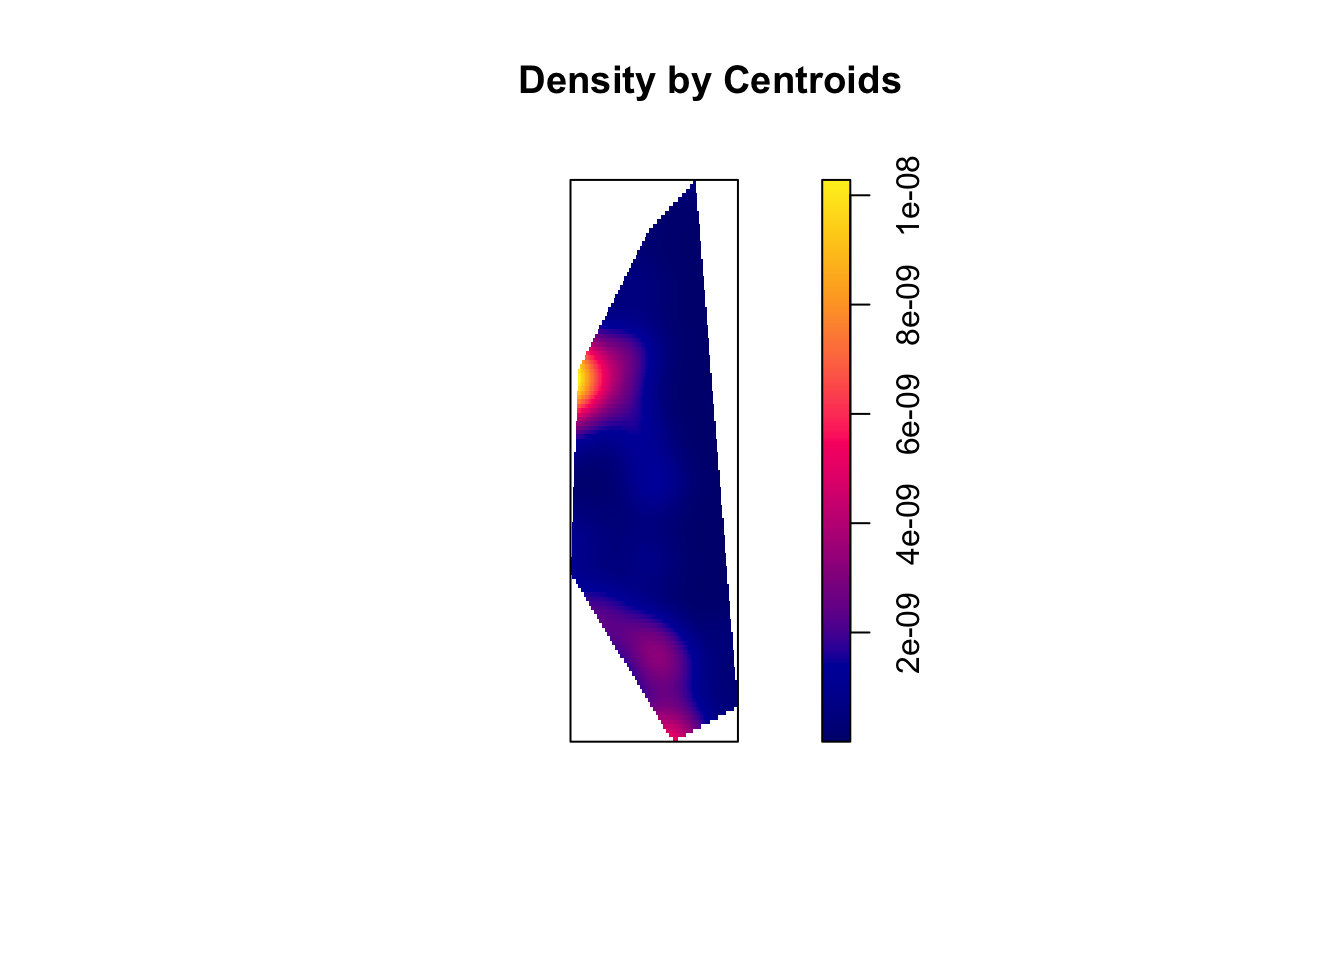

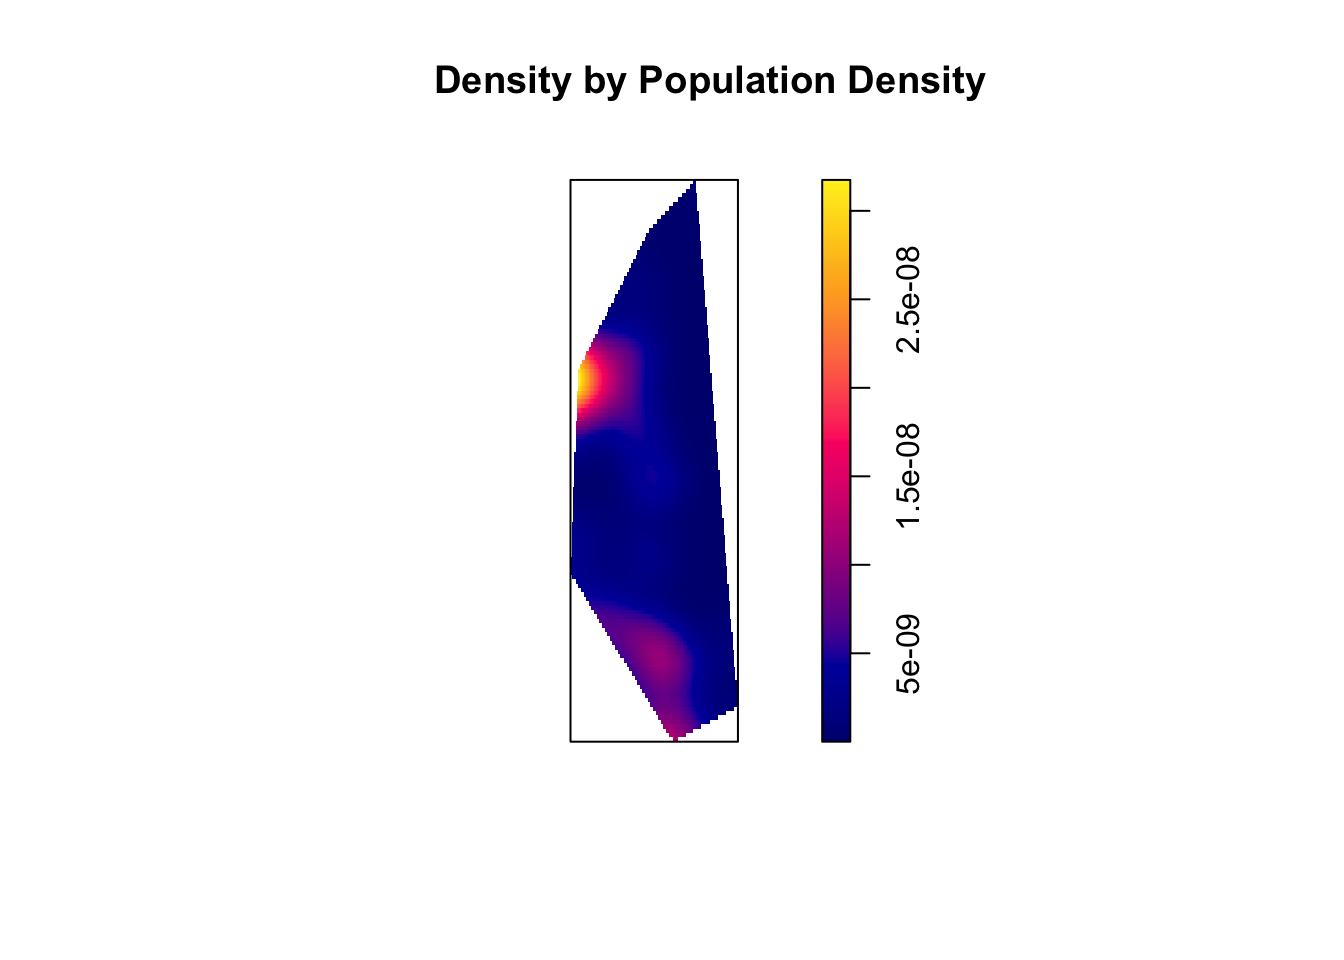

In [ ]:
library(dplyr)
pop_sf <- strike_tract_centroids |> dplyr::select(population_density)
pop_sf <- st_transform(pop_sf, crs=3587)
hull_sf <- st_transform(hull_sf, crs=3587)
point_coords <- st_coordinates(pop_sf)
marks_data <- pop_sf$population_density
pop_ppp <- ppp(x = point_coords[, 1], 
               y = point_coords[, 2], 
               marks = marks_data, 
               window = as.owin(hull_sf))
#pop_ppp <- as.ppp(pop_sf, W=as.owin(hull_sf))
plot(density(pop_ppp), main="Density by Centroids")

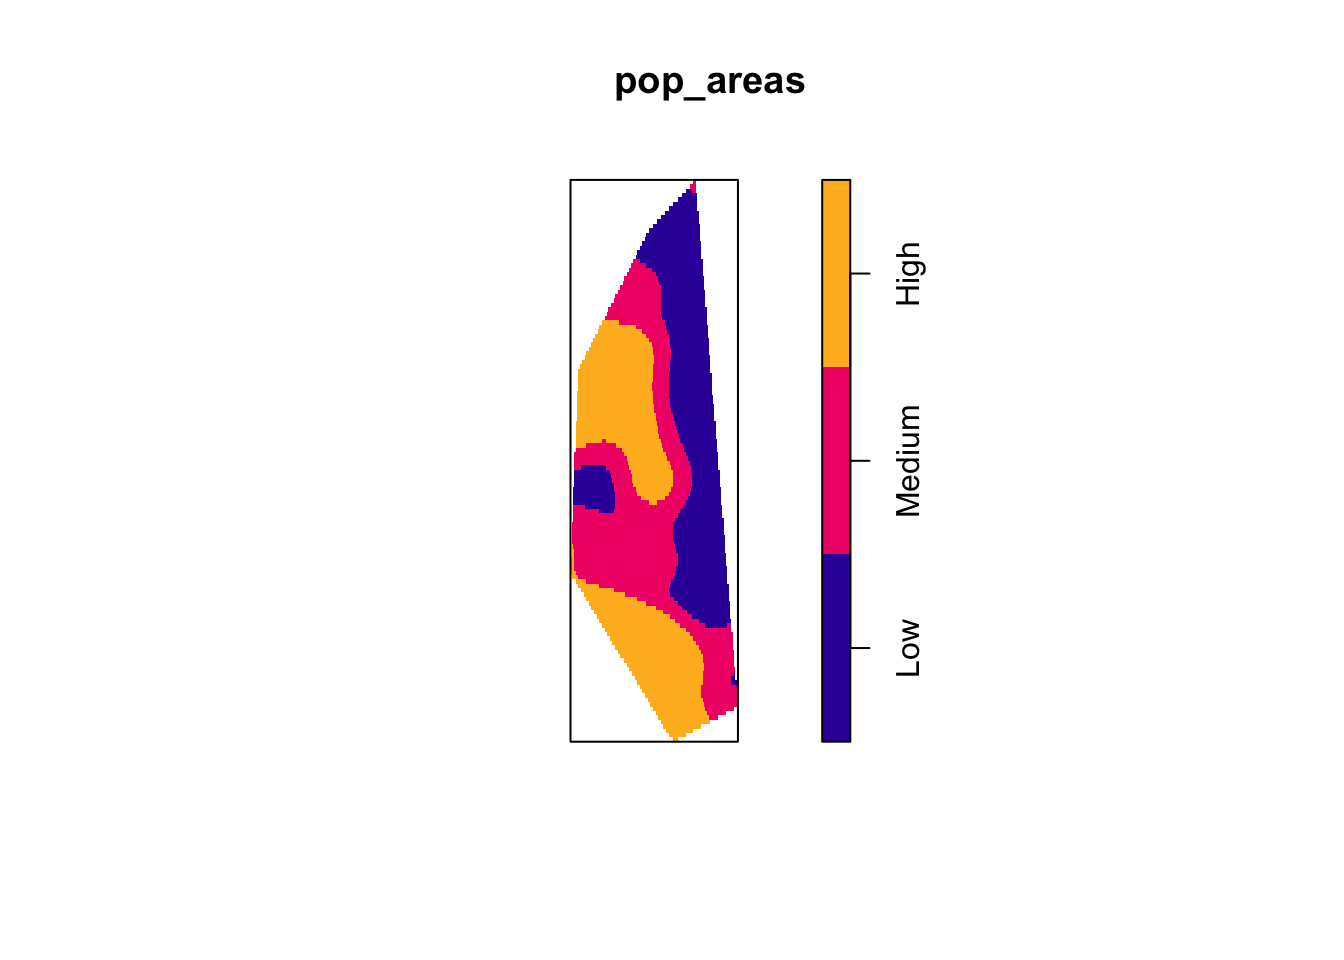

In [ ]:
num_regions <- 3
region_labels <- c("Low", "Medium", "High")
pop_vals <- pop_int
pop_quant <- quantile(pop_vals, probs=(0:num_regions)/num_regions, na.rm=TRUE)
pop_cut <- cut(pop_vals, breaks=pop_quant, labels=region_labels)
pop_areas <- tess(image=pop_cut)
plot(pop_areas)

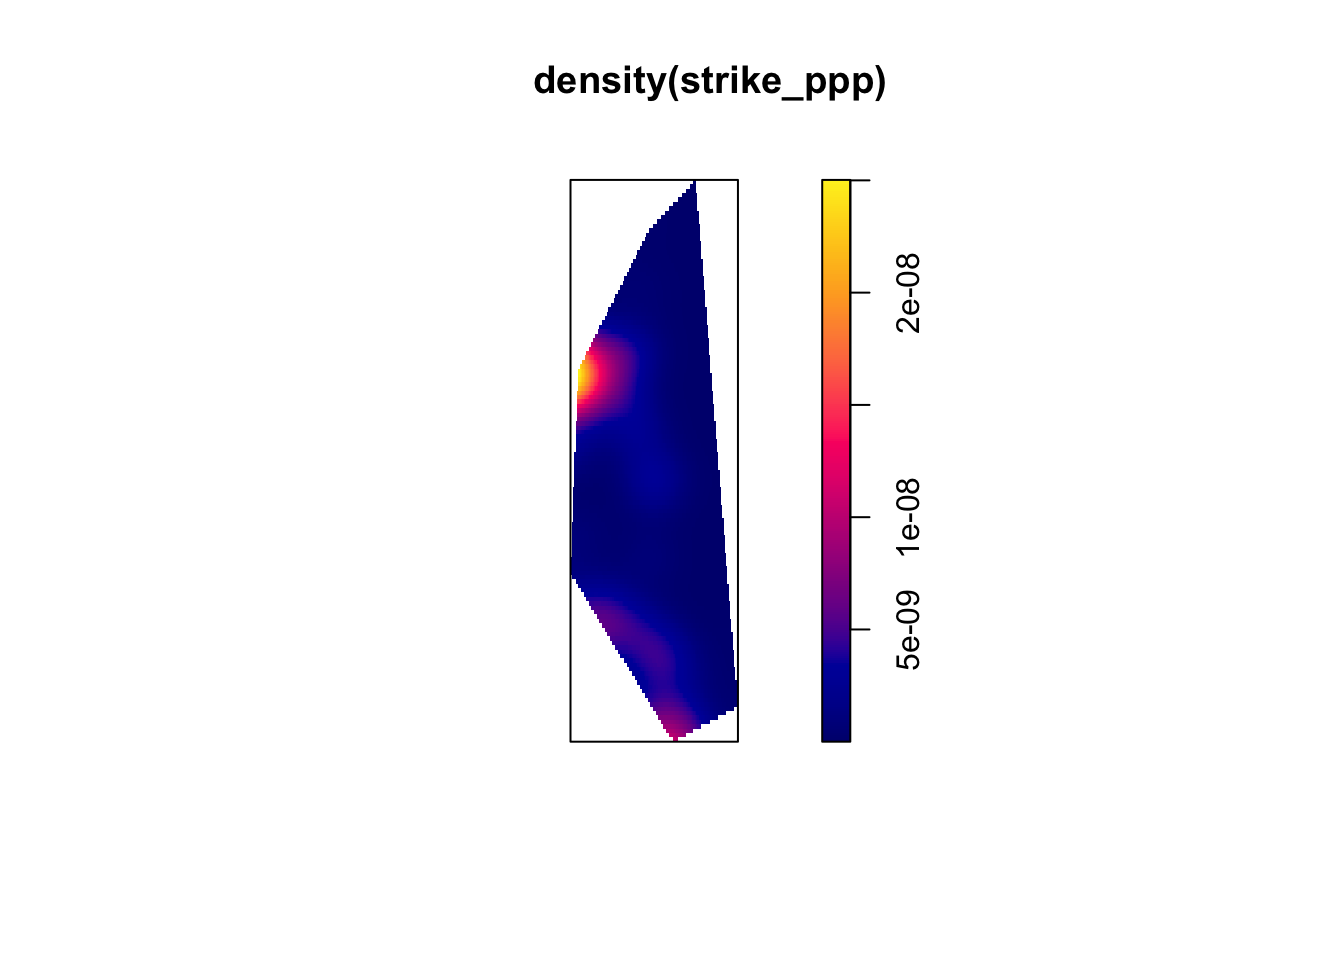

In [ ]:
strike_ppp <- as.ppp(st_as_sfc(trespasser_sf), Window(pop_ppp))

In [ ]:
obs_strike_counts <- quadratcount(strike_ppp, tess=pop_areas) |> as.vector()
names(obs_strike_counts) <- region_labels
obs_strike_counts

   Low Medium   High 
     1     36    437 

`.name_repair` is omitted as of tibble 2.0.0.
ℹ Using compatibility `.name_repair`.

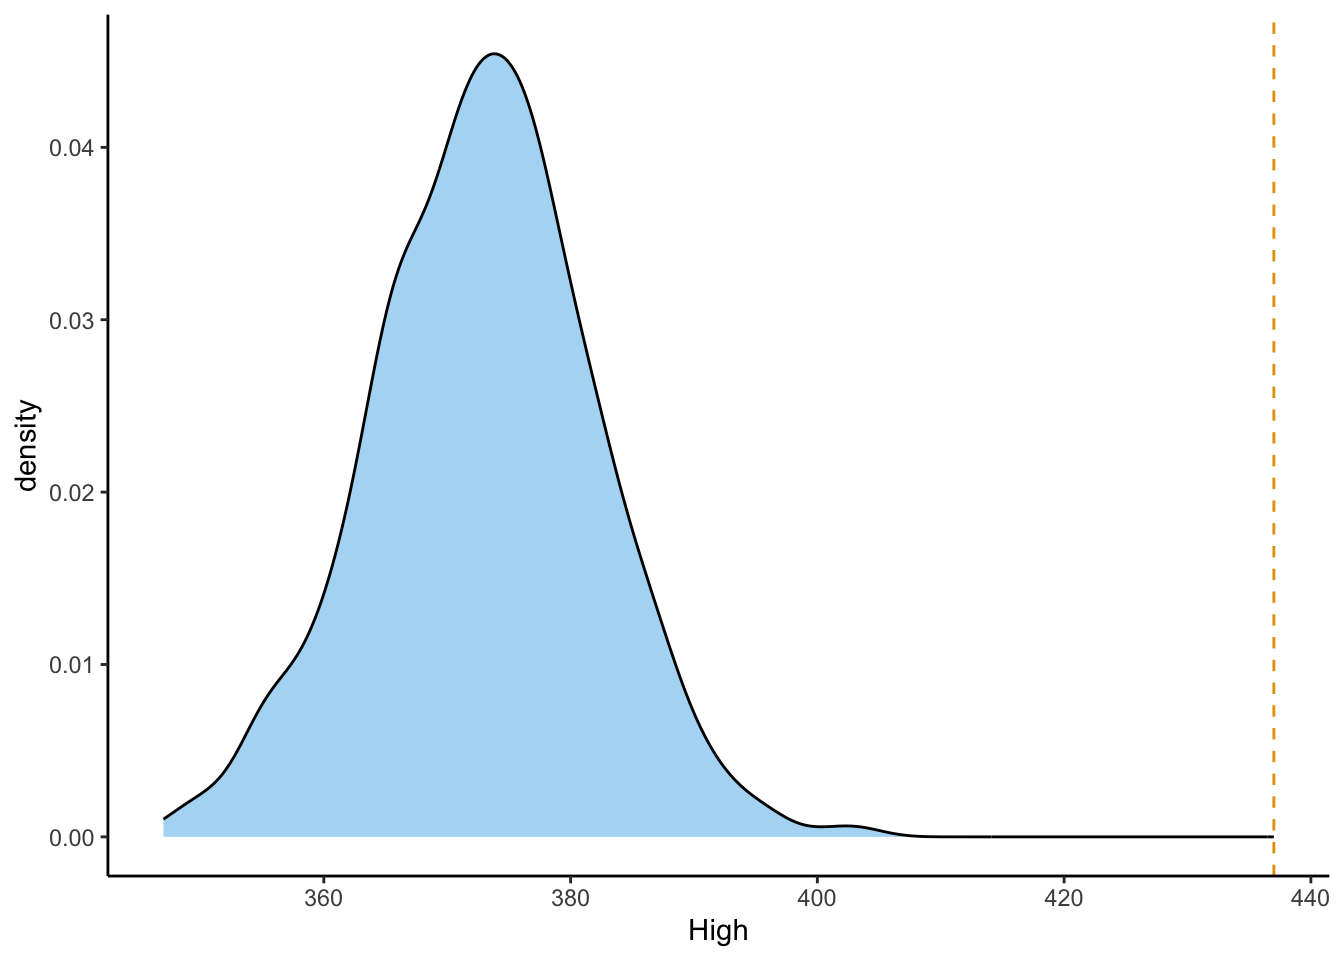

In [ ]:
set.seed(6805)
compute_quadrat_counts <- function(sim_ppp) {
  sim_counts <- quadratcount(sim_ppp, tess=pop_areas) |> as.vector()
  names(sim_counts) <- region_labels
  return(sim_counts)
}
gen_sims_ppp <- function(num_sims) {
  strike_sims <- spatstat.random::rpoint(
    n = nrow(trespasser_sf),
    f = pop_int,
    nsim = num_sims
  )
  return(strike_sims)
}
full_sims_list <- gen_sims_ppp(num_sims = 999)
full_sim_area_counts <- lapply(X=full_sims_list, FUN=compute_quadrat_counts)
full_count_df <- as_tibble(full_sim_area_counts) |> t() |> as_tibble()

In [ ]:
q4_more_extreme_df <- mc_df[mc_df$High >= obs_strike_counts["High"],]
q4_prop_more_extreme <- nrow(q4_more_extreme_df) / nrow(mc_df)
q4_prop_more_extreme

[1] 0.001

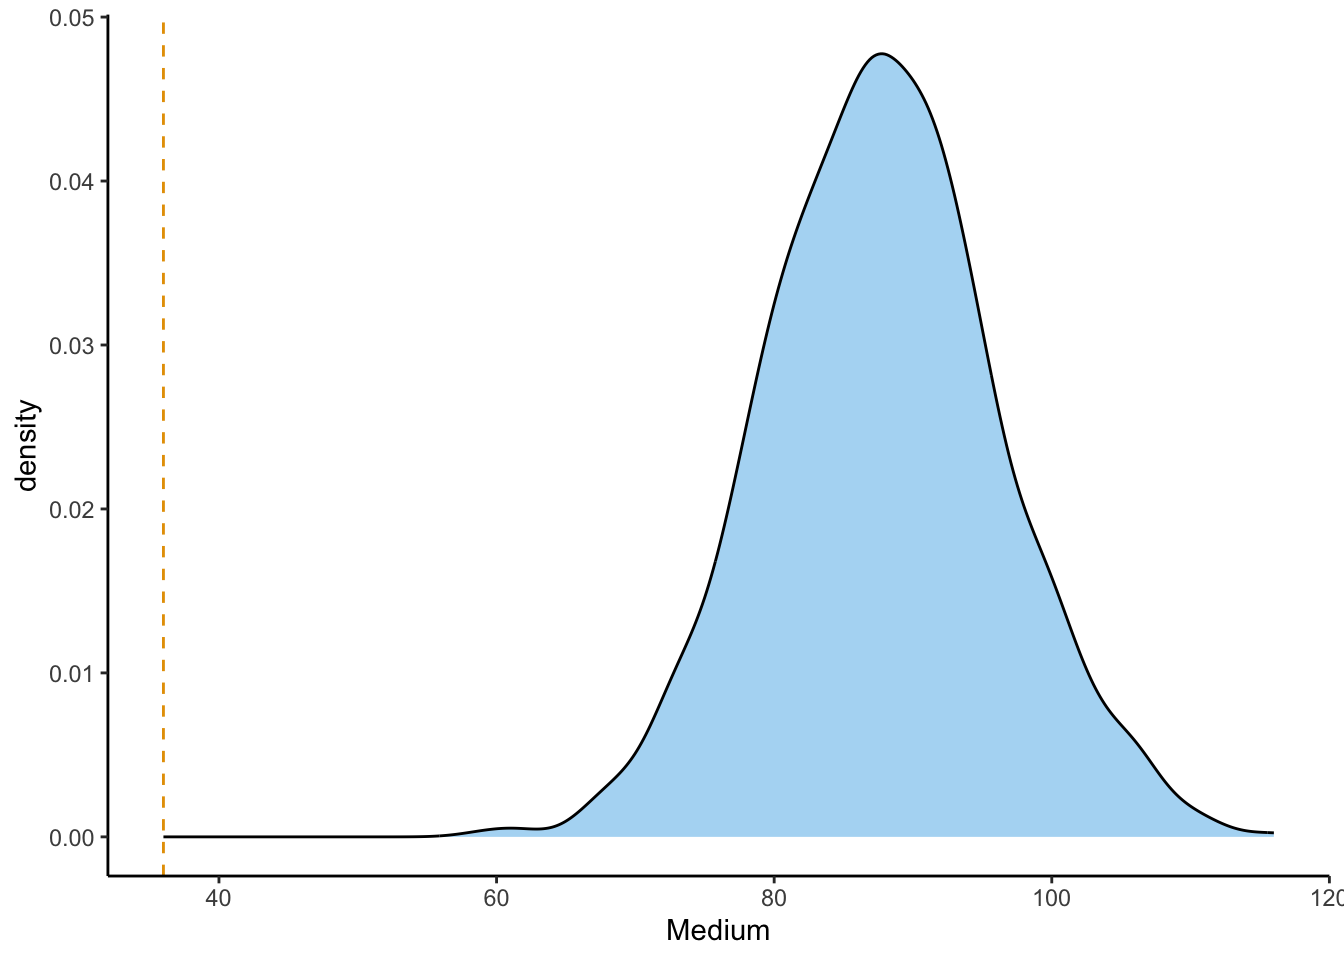

In [ ]:
mc_df <- bind_rows(full_count_df, obs_strike_counts)
full_count_df |> ggplot(aes(x=Medium)) +
  #geom_bar(stat='count') +
  geom_density(fill=cb_palette[2], alpha=0.5) +
  geom_vline(xintercept = obs_strike_counts["Medium"], linetype="dashed", color=cb_palette[1]) +
  theme_classic()

In [ ]:
q4_more_extreme_df <- mc_df[mc_df$Medium <= obs_strike_counts["Medium"],]
q4_prop_more_extreme <- nrow(q4_more_extreme_df) / nrow(mc_df)
q4_prop_more_extreme

[1] 0.001

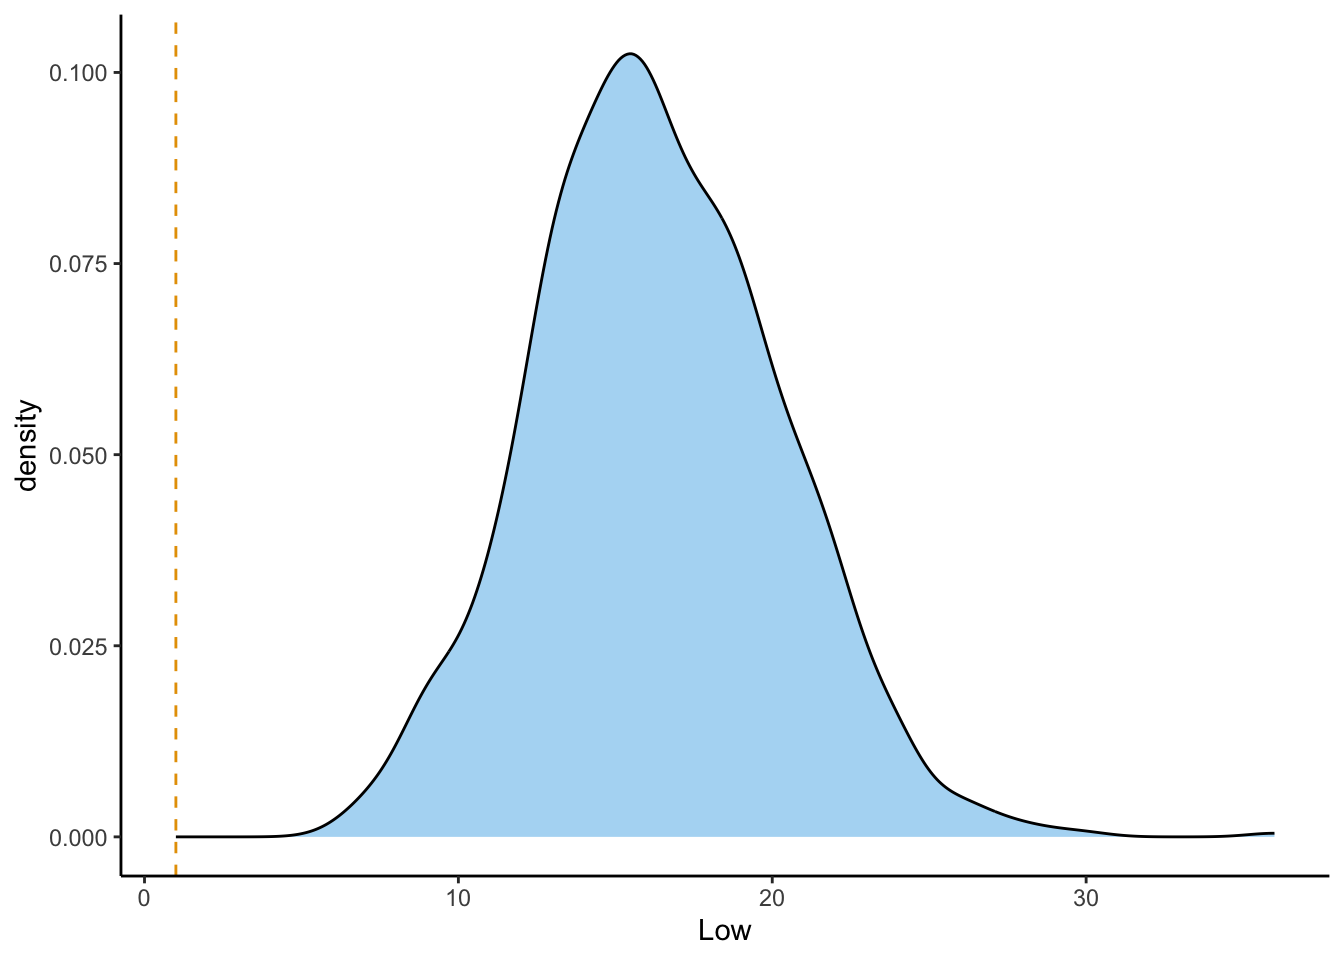

In [ ]:
mc_df <- bind_rows(full_count_df, obs_strike_counts)
full_count_df |> ggplot(aes(x=Low)) +
  #geom_bar(stat='count') +
  geom_density(fill=cb_palette[2], alpha=0.5) +
  geom_vline(xintercept = obs_strike_counts["Low"], linetype="dashed", color=cb_palette[1]) +
  theme_classic()

In [ ]:
q4_more_extreme_df <- mc_df[mc_df$Medium <= obs_strike_counts["Medium"],]
q4_prop_more_extreme <- nrow(q4_more_extreme_df) / nrow(mc_df)
q4_prop_more_extreme

[1] 0.001

In [ ]:
#merged_sub_sf <- readRDS("merged_sub_sf.rds")
#merged_sub_sf |> head()

In [ ]:
#merged_sub_sf |> ggplot(aes(x=scaled_dist, y=total_score, label=NAME_ENGLI)) +
#  geom_point() +
#  geom_smooth(method='lm', formula= y~x) +
#  geom_text(size=4, nudge_y = 0.075) +
 # theme_classic()

## Discussion

## Conclusion

Our evidence indicates that the spatial dynamics of **conflict** differ from the spatial dynamics of **misgovernance**. Whereas

Berger, Miriam. 2021. “Myanmar’s Military Built a New Capital as a Haven for Power. Other Countries Have Tried That, Too.” *Washington Post*, February. <https://www.washingtonpost.com/world/2021/02/06/myanmars-military-built-new-capital-haven-power-other-countries-have-tried-that-too/>.

Campante, Filipe R., Quoc-Anh Do, and Bernardo Guimaraes. 2019. “Capital Cities, Conflict, and Misgovernance.” *American Economic Journal: Applied Economics* 11 (3): 298–337. <https://doi.org/10.1257/app.20170111>.

Hall, Ola, Maria Francisca Archila Bustos, Niklas Boke Olén, and Thomas Niedomysl. 2019. “Population Centroids of the World Administrative Units from Nighttime Lights 1992-2013.” *Scientific Data* 6 (1): 235. <https://doi.org/10.1038/s41597-019-0250-z>.

Sackur, Stephen. 2012. “Equatorial Guinea: Obiang’s Future Capital, Oyala.” *BBC News*, December. <https://www.bbc.com/news/magazine-20731448>.